<a href="https://colab.research.google.com/github/therohitsingla/Topsis-for-best-pretrained-models/blob/main/Topsis_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install numpy pandas matplotlib rouge-score transformers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rouge_score import rouge_scorer
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
import time

# Sample data (ROUGE-1, Inference Time (s), Model Size (GB))
models = {
    "DialoGPT-medium": [0.45, 0.67, 4.2],
    "OPT-1.3b": [0.50, 1.03, 7.5],
    "BLOOM-560m": [0.48, 0.78, 3.1]
}

criteria = {
    'weights': [0.5, 0.25, 0.25],
    'impacts': ['+', '-', '-']
}

df = pd.DataFrame(models).T
df.columns = ['ROUGE-1', 'Inference Time', 'Model Size']
print("Initial Data:")
display(df)

Initial Data:


,ROUGE-1,Inference Time,Model Size
DialoGPT-medium,0.45,0.67,4.2
OPT-1.3b,0.50,1.03,7.5
BLOOM-560m,0.48,0.78,3.1


In [3]:
def topsis_rank(dataframe, weights, impacts):
    """
    Perform TOPSIS ranking on given dataframe

    Parameters:
    dataframe : pandas.DataFrame
    weights : list of float
    impacts : list of '+'/'−'
    """

    # Normalization
    raw_data = dataframe.values
    norm_data = raw_data / np.linalg.norm(raw_data, axis=0)

    # Weighting
    weighted = norm_data * weights

    # Ideal solutions
    ideal_best = np.array([
        max(col) if impact == '+' else min(col)
        for col, impact in zip(weighted.T, impacts)
    ])
    ideal_worst = np.array([
        min(col) if impact == '+' else max(col)
        for col, impact in zip(weighted.T, impacts)
    ])

    # Distances
    d_best = np.linalg.norm(weighted - ideal_best, axis=1)
    d_worst = np.linalg.norm(weighted - ideal_worst, axis=1)

    # TOPSIS Score
    scores = d_worst / (d_best + d_worst)

    return scores


# Calculate scores
scores = topsis_rank(df, criteria['weights'], criteria['impacts'])
df['TOPSIS Score'] = scores
df['Rank'] = df['TOPSIS Score'].rank(ascending=False).astype(int)
df.sort_values('Rank', inplace=True)

# Display results
print("\n🏆 Final Ranking:")
display(df[['TOPSIS Score', 'Rank']])



🏆 Final Ranking:


,TOPSIS Score,Rank
BLOOM-560m,0.851924,1
DialoGPT-medium,0.719454,2
OPT-1.3b,0.182700,3


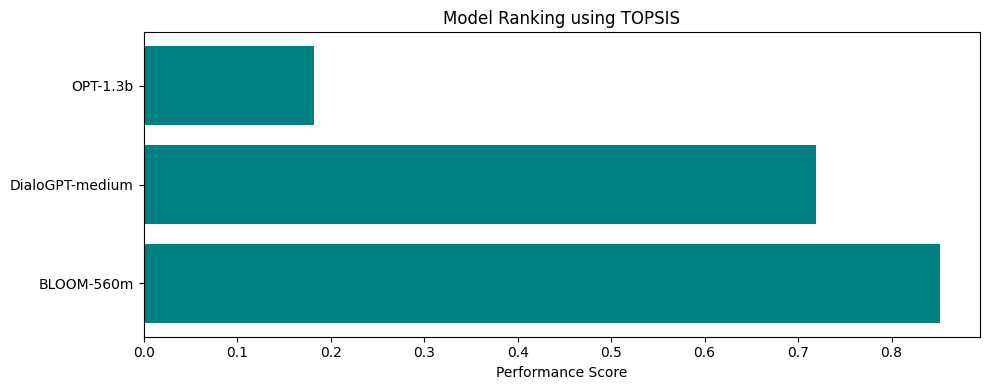

In [4]:
# Visualization
plt.figure(figsize=(10, 4))
plt.barh(df.index, df['TOPSIS Score'], color='teal')
plt.title('Model Ranking using TOPSIS')
plt.xlabel('Performance Score')
plt.tight_layout()
plt.show()